# Author: ddukic

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def prepare_dfs(no_mlm_path, mlm_path):
    no_mlm = pd.read_csv(no_mlm_path)
    mlm = pd.read_csv(mlm_path)

    no_mlm = no_mlm[no_mlm.setup.apply(lambda x: "joint" not in x)].reset_index(
        drop=True
    )

    mlm["mlm"] = "MLM"

    no_mlm["mlm"] = "No MLM"

    merged = pd.concat(
        [
            no_mlm,
            mlm,
        ]
    ).reset_index(drop=True)

    remap_setup_dict = {
        "only_target_from_roberta": "ft. RoBERTa-base",
        "seq_pretrained_on_source": "Seq. ft. RoBERTa-source",
    }
    remap_model_dict = {
        "vanilla": "Vanilla",
        "implicit_multitask": "Implicit",
        "two_head_multitask": "Explicit",
    }

    merged.setup = merged.setup.map(remap_setup_dict)
    merged.model = merged.model.map(remap_model_dict)

    merged_from_roberta = merged[
        merged.setup.apply(lambda x: "RoBERTa-base" in x)
    ].reset_index(drop=True)

    merged_from_source = merged[
        merged.setup.apply(lambda x: "RoBERTa-source" in x)
    ].reset_index(drop=True)

    return merged_from_roberta, merged_from_source

In [3]:
def plot_graphs(no_mlm_path, mlm_path):
    for i, (df, setup) in enumerate(
        zip(prepare_dfs(no_mlm_path, mlm_path), ["from_roberta", "from_source"])
    ):
        plt.figure(i)
        print(setup)
        # standard is 300
        plt.rcParams["figure.dpi"] = 300
        sns.set_style("whitegrid")
        sns.set_context("talk")
        # sns.set_context("paper")
        plt.yticks(np.arange(0.00, max(df["F1"]), 0.05), fontsize=14)
        # tick_map = {0: 0, 5: 12.5, 10: 25, 50: 125, 100: 250, 250: 375, 500: 500}
        tick_map = {
            0: 0,
            5: 83.33,
            10: 166.66,
            50: 249.99,
            100: 333.32,
            250: 416.65,
            500: 500,
        }
        df["shot"] = df["shots"].map(tick_map)
        sns.lineplot(
            data=df,
            x="shot",
            y="F1",
            hue="model",
            style="mlm",
            alpha=0.6,
            palette=sns.color_palette("colorblind"),
            dashes=[(1, 0), (5, 2, 1, 2)],
        )
        plt.legend(fontsize=10)
        plt.xticks(list(tick_map.values()), list(tick_map.keys()), rotation=45, fontsize=14)
        plt.margins(x=0.025, y=0.025)
        # for tick, size in zip(plt.xticks()[-1], [5, 6, 7, 10, 12, 14, 16.5]):
        #    tick.set_fontsize(size)
        plt.show()

from_roberta


/tmp/ipykernel_59096/2039514251.py:24: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.lineplot(


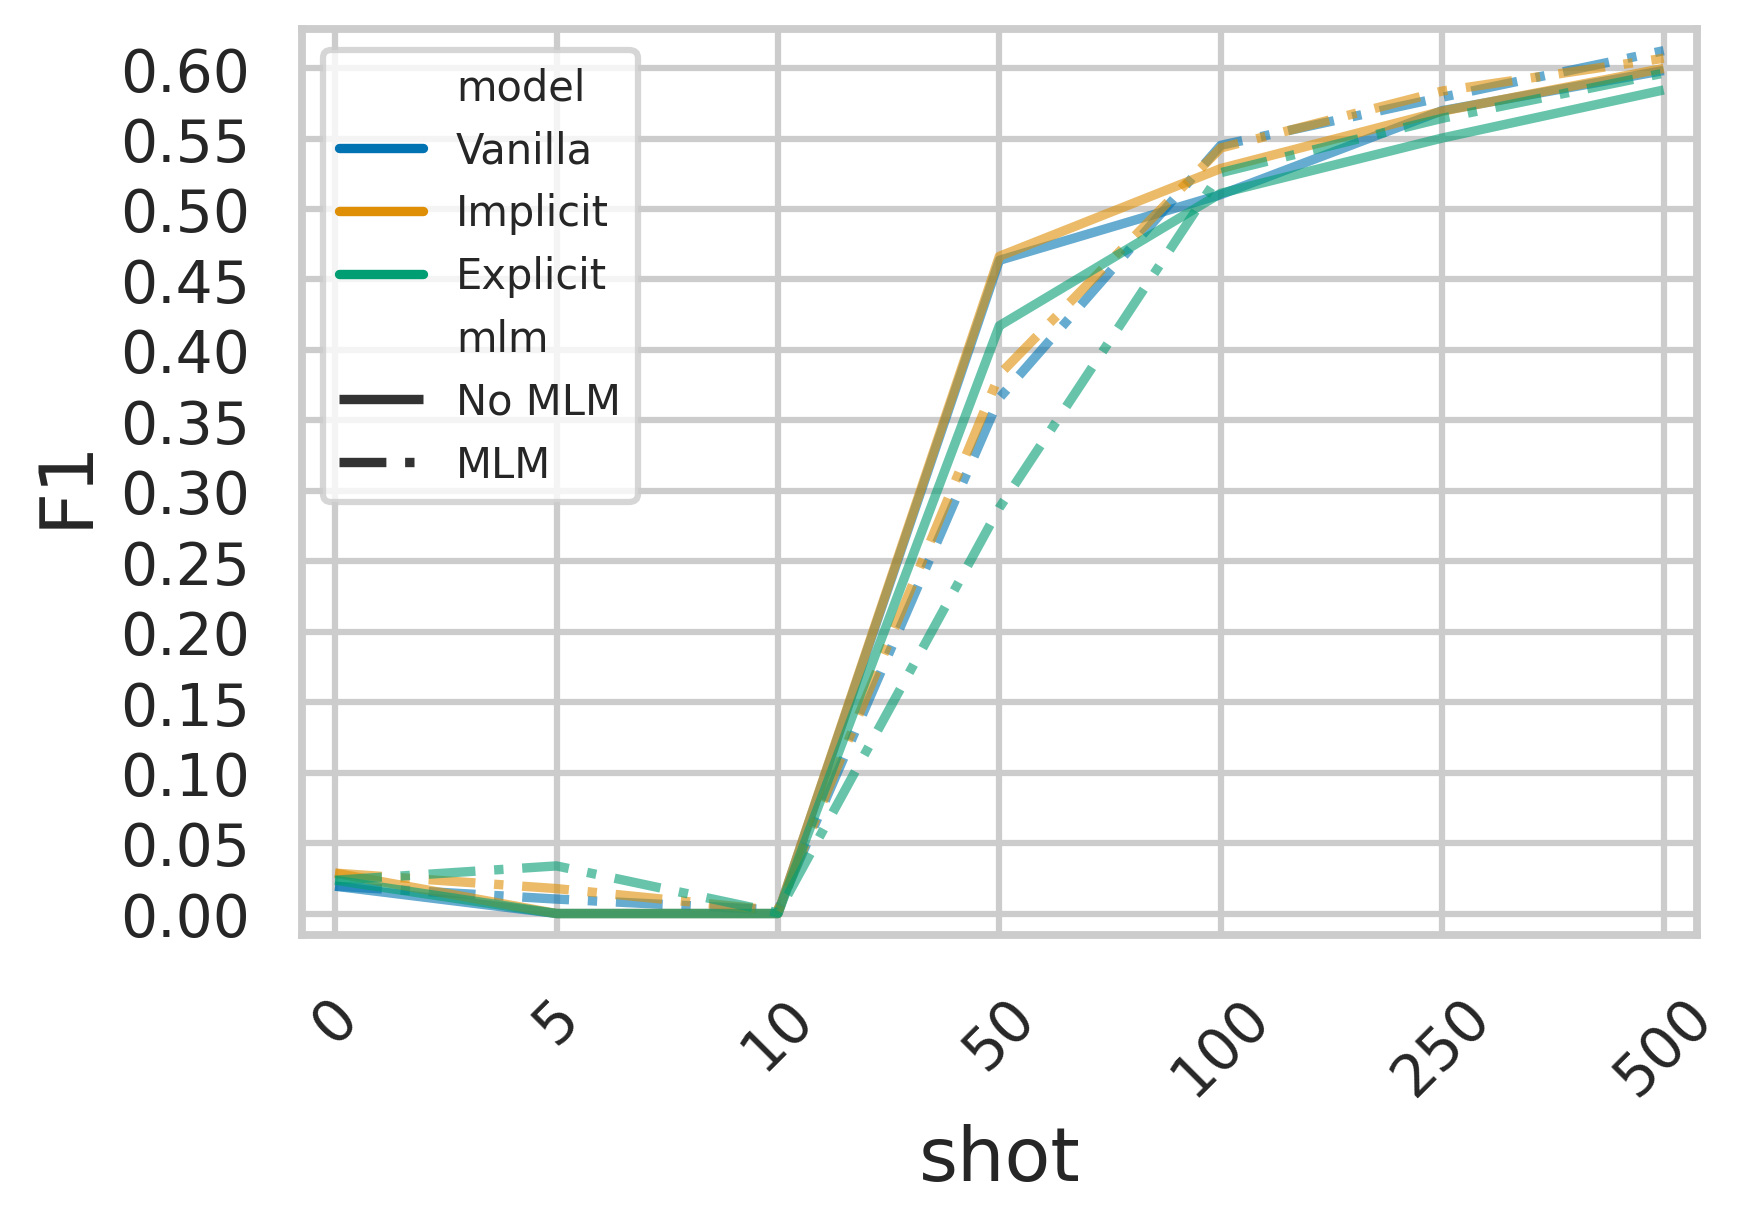

from_source


/tmp/ipykernel_59096/2039514251.py:24: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.lineplot(


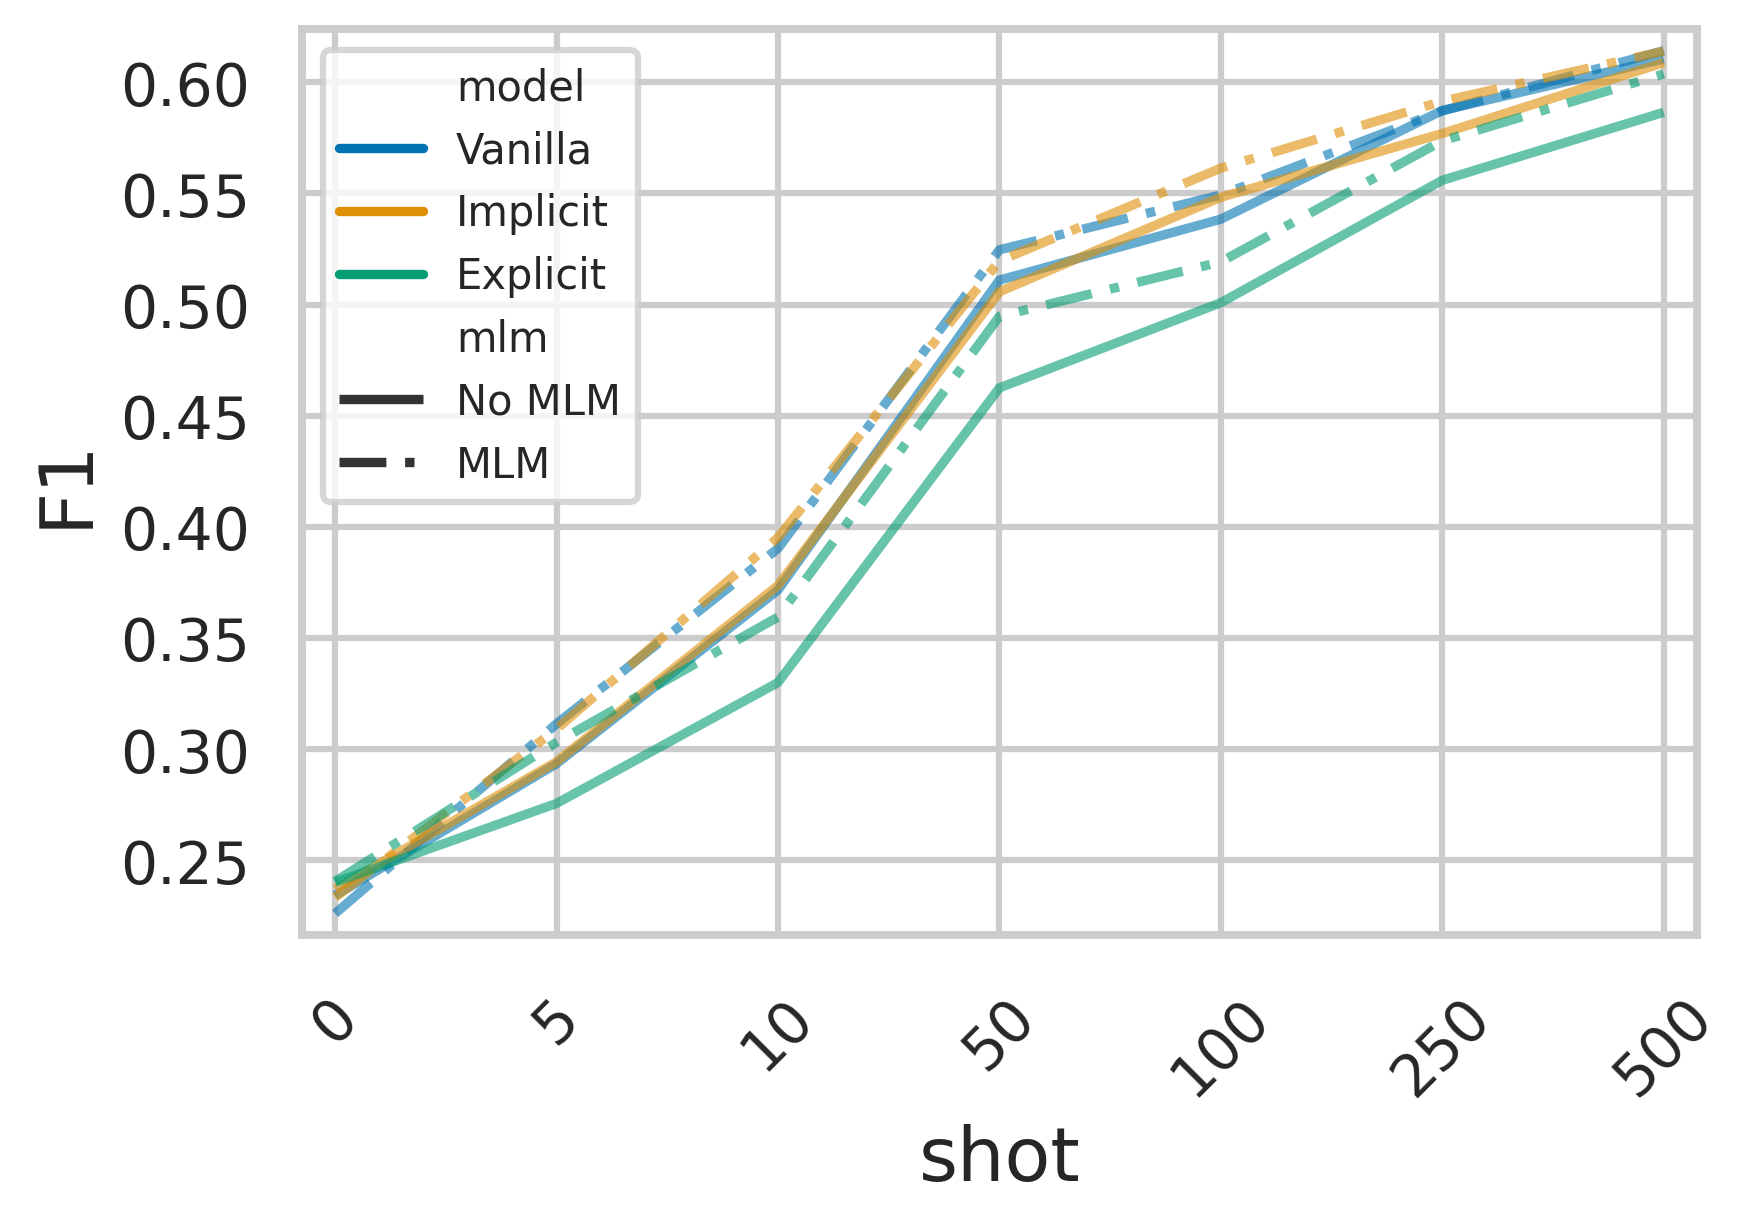

In [7]:
# maven to ace
plot_graphs("maven_to_ace/no_mlm.csv", "maven_to_ace/mlm/mlm.csv")

from_roberta


/tmp/ipykernel_59096/2039514251.py:24: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.lineplot(


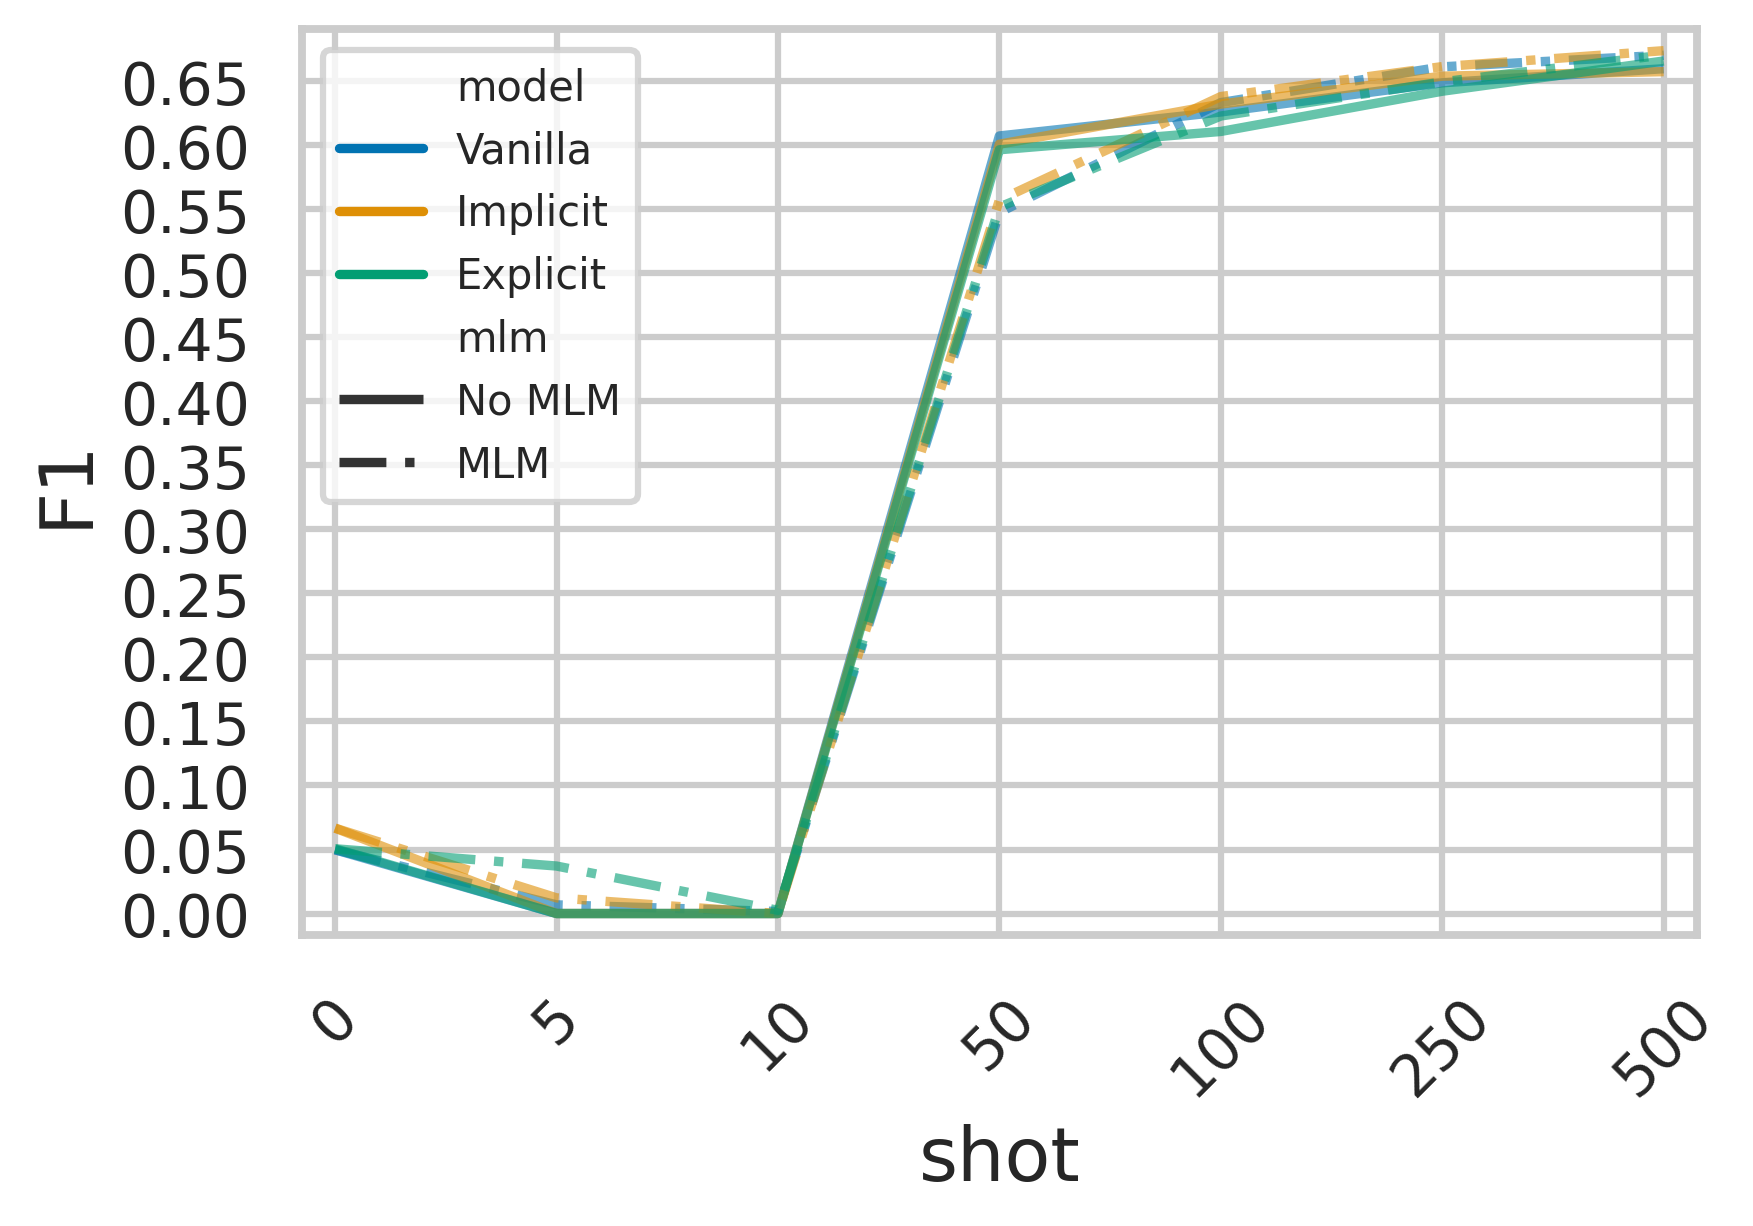

from_source


/tmp/ipykernel_59096/2039514251.py:24: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.lineplot(


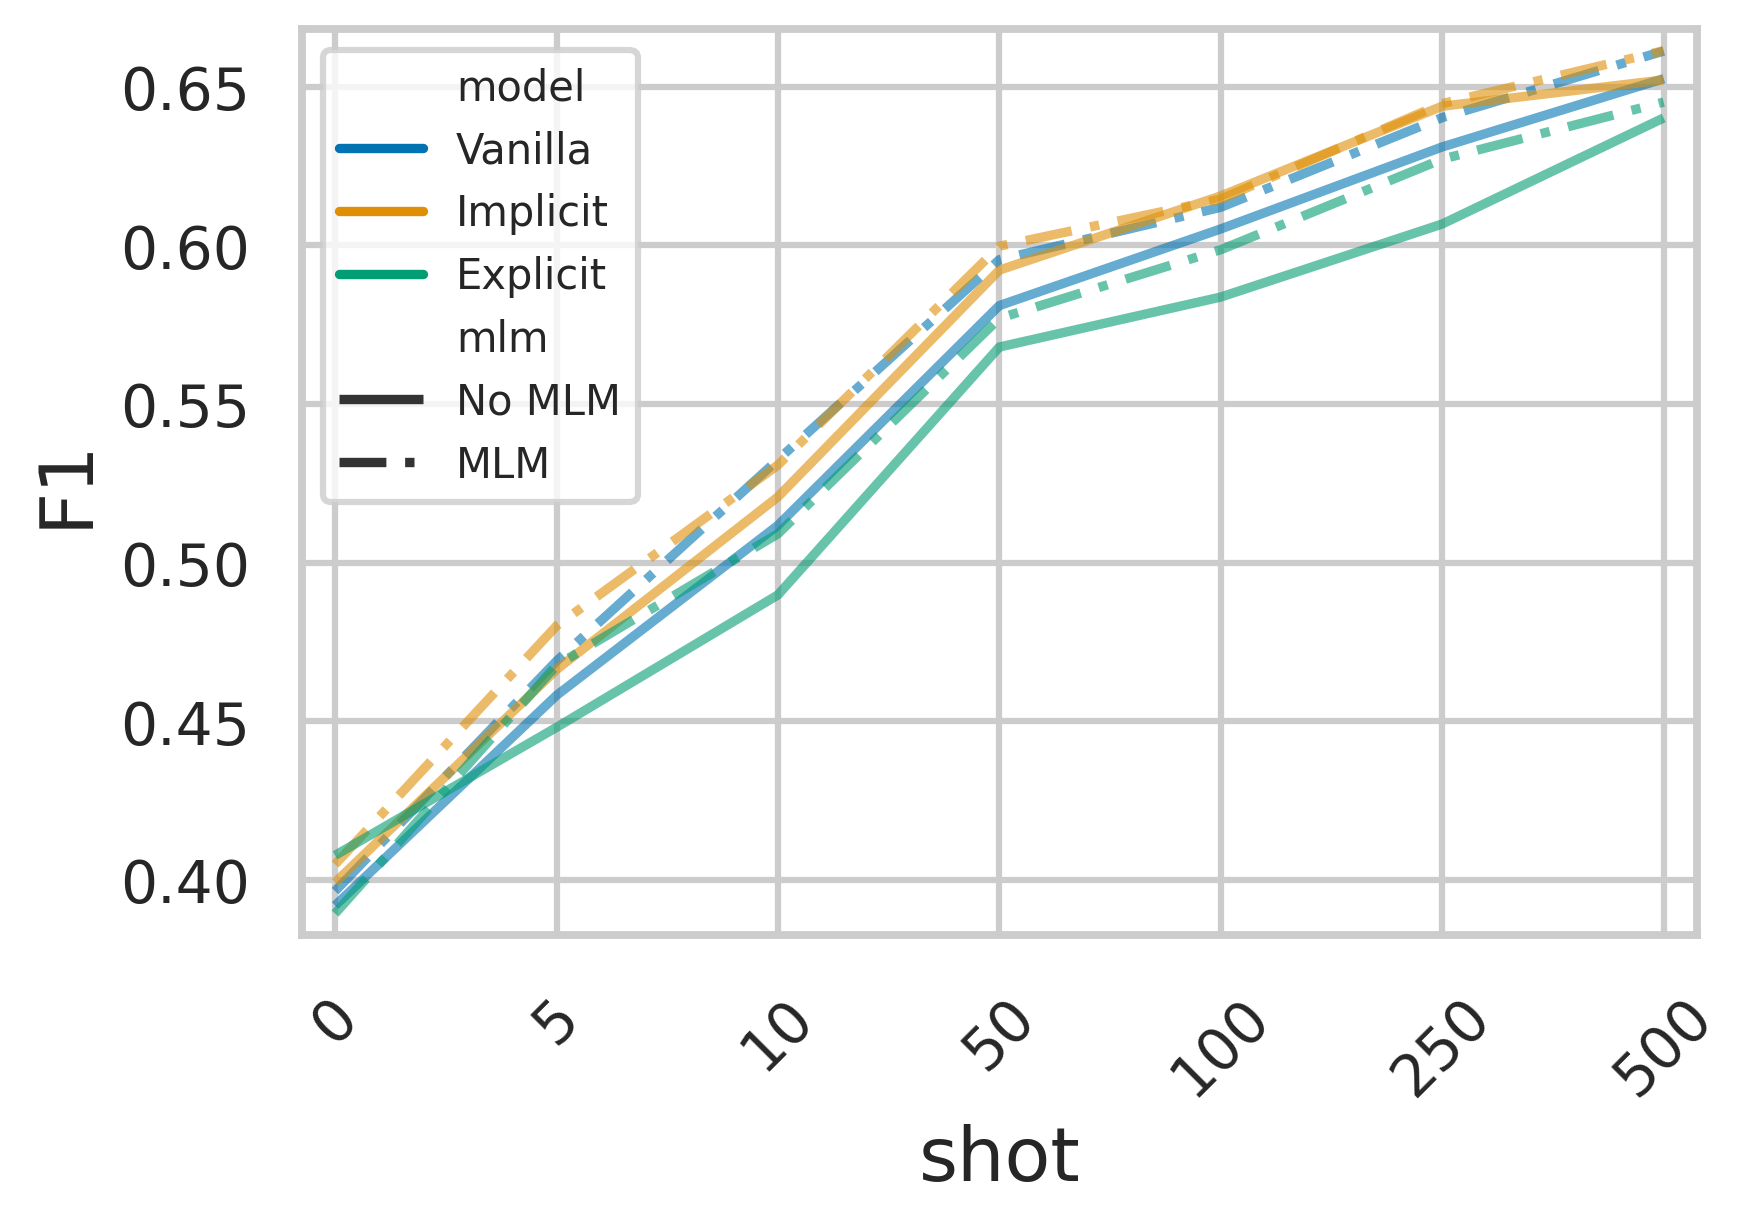

In [5]:
# maven to ednyt
plot_graphs("maven_to_ednyt/no_mlm.csv", "maven_to_ednyt/mlm/mlm.csv")

from_roberta


/tmp/ipykernel_59096/2039514251.py:24: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.lineplot(


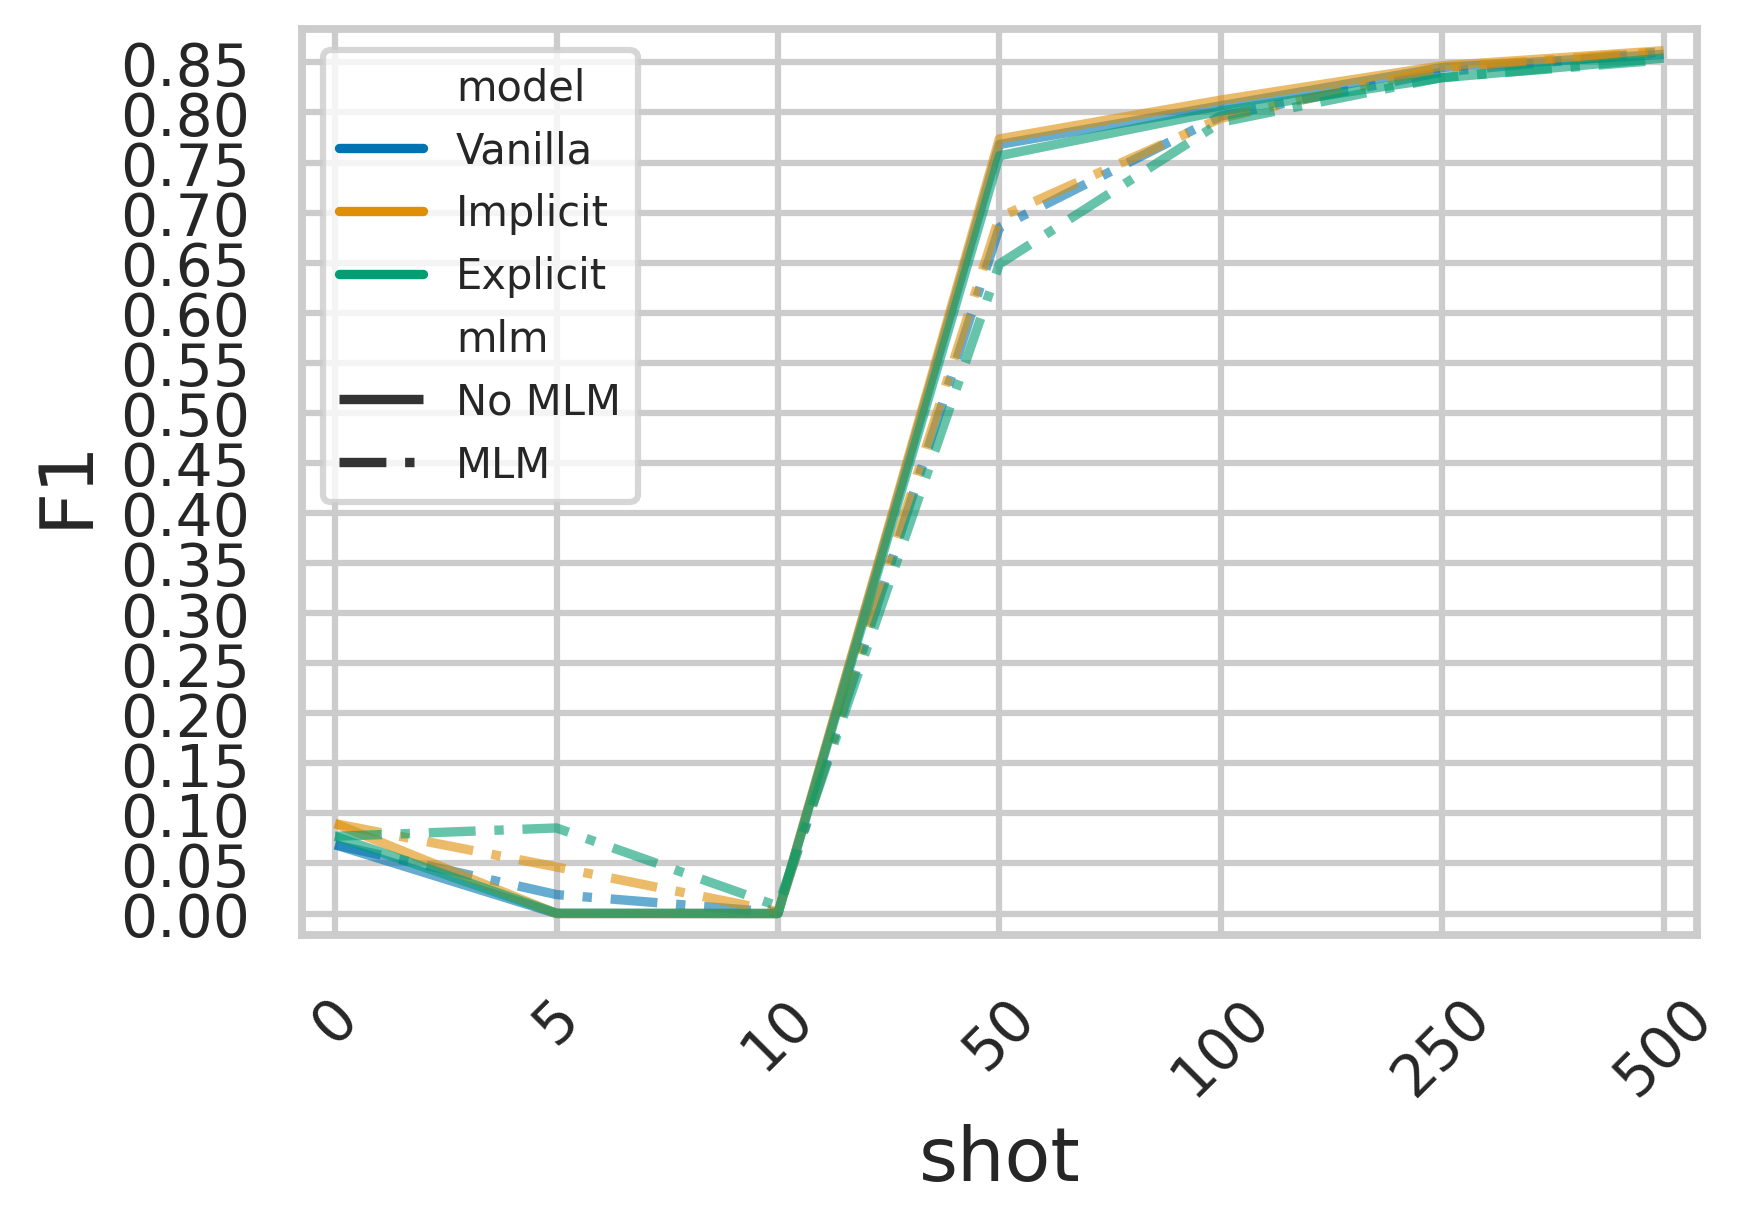

from_source


/tmp/ipykernel_59096/2039514251.py:24: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.lineplot(


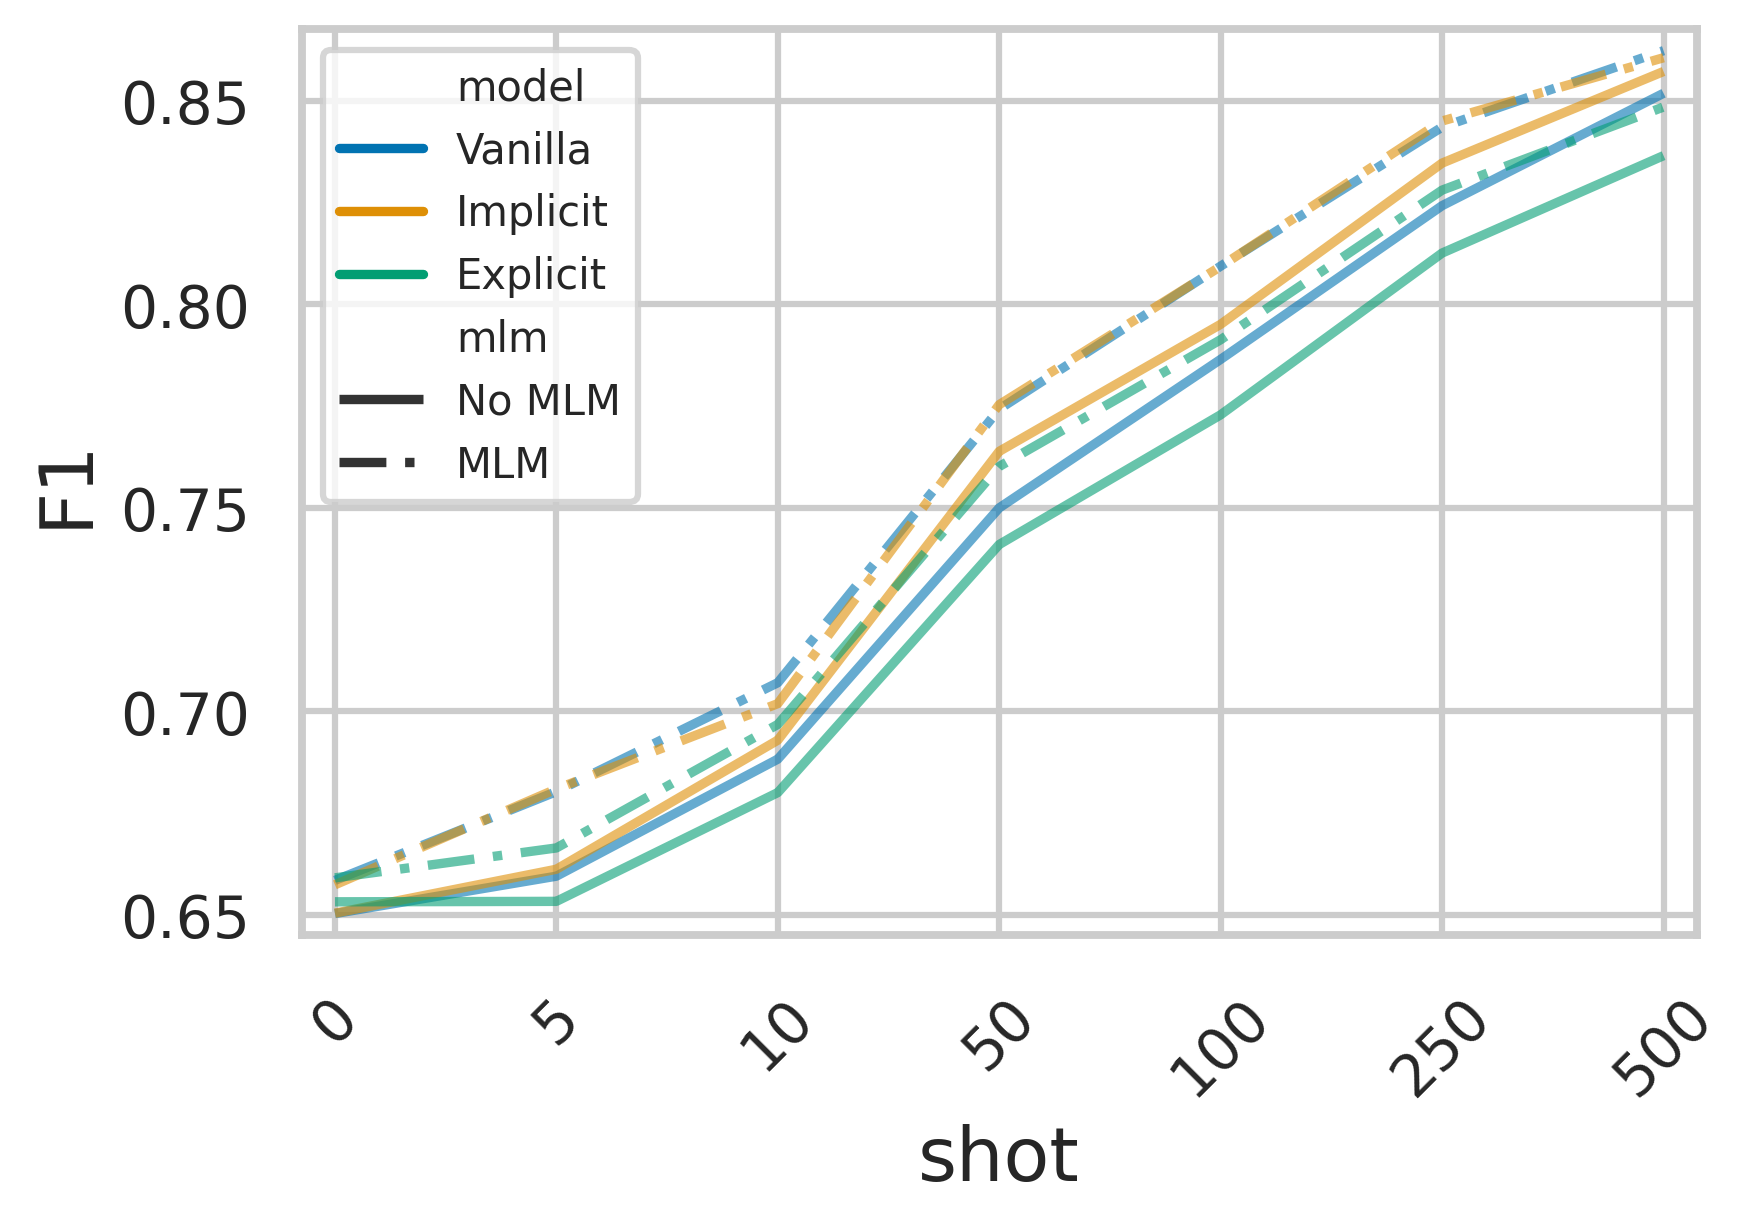

In [6]:
# maven to evextra
plot_graphs("maven_to_evextra/no_mlm.csv", "maven_to_evextra/mlm/mlm.csv")